In [6]:
#Finding shortest path from Islamabad to Karachi is implemented using my own method in the end,
#It is also implemented using dijsektra algorithm in the start

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, iterations=200)
    options = {'node_color':'pink', 'alpha':1, 'node_size':2500, 'width':0.2, 'font_color':'darkred', 
               'font_size':12, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    plt.show()

In [8]:
class DiGraph:
    def __init__(self):
        self.g = {}
    
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already is graph")
            
        self.g[node] = []
        
    def add_edge(self, src, dest):
        if src not in self.g:
            raise ValueError("Source not in graph")
            
        if dest not in self.g:
            raise ValueError("Destination not in graph")

        src_edges = self.g[src]
        if dest in src_edges:
            return
        
        src_edges.append(dest)
        
    def traverse_graph(self, start):
        que = [ start ]
        visited = []
        
        while que:
            current_node = que.pop(0)
            
            if current_node in visited:
                continue
            
            print(current_node)
            visited.append(current_node)
            
            neighbors = self.g[current_node]
            for n in neighbors:
                que.append(n)
                
    def find_path(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start is not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end is not in graph")

        #rint(start, ',', end)
            
        path = path + [start]
        
        if start == end:
            return path
                
        for neighbor in self.g[start]:
            if neighbor not in path:
                newpath = self.find_path(neighbor, end, path)
                if newpath:
                    return newpath
                
        return None
    
    def find_all_paths(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end not in graph")

        #print(start, ",", end)
        
        path = path + [start]
        all_paths = []
        
        if start == end:
            return [ path ]

        for neighbor in self.g[start]:
            if neighbor not in path:
                all_newpaths = self.find_all_paths(neighbor, end, path)
                for newpath in all_newpaths:
                    all_paths.append(newpath)
                    
        return all_paths
    
    def find_shortest_path(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end not in graph")
            
        path = path + [start]
        
        if start == end:
            return path
        
        shortest = None
        
        for neighbor in self.g[start]:
            newpath = self.find_shortest_path(neighbor, end, path)
            if newpath:
                if shortest is None or len(newpath) < len(shortest):
                    shortest = newpath
                    
        return shortest
    
    def find_shortest_path_different_method(self, start, end):
        all_paths = self.find_all_paths(start, end)
        all_paths.sort(reverse=True)
        
        if len(all_paths) == 0:
            return []
        shortest = all_paths[0]
        all_shortest = [shortest]
        
        for path in all_paths:
            if path in all_shortest:
                continue
                
            if len(path) <= len(shortest):
                shortest = path
                all_shortest.append(path)
        
        if len(all_shortest) == 1:
            return all_shortest[0]
        
        if len(all_shortest) > 1:
            return all_shortest
        
    
    def draw_graph(self):
        G = nx.DiGraph()
        
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest)
                
        draw_graph_with_nx(G)
        

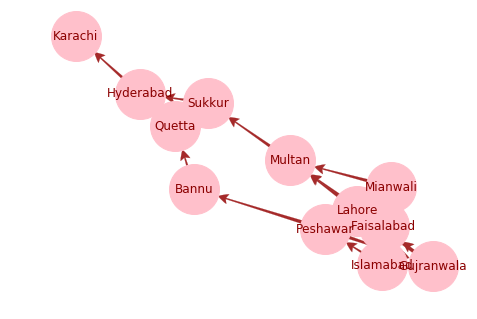

In [9]:
g = DiGraph()
cities = ['Islamabad', 'Peshawar', 'Gujranwala', 'Lahore', 'Faisalabad', 
          'Multan', 'Sukkur', 'Hyderabad', 'Karachi', 'Bannu', 'Quetta', 
          'Mianwali']
for c in cities:
    g.add_node(c)
    
edges = [
    ('Islamabad', 'Peshawar'),
    ('Peshawar', 'Gujranwala'),
    ('Gujranwala', 'Lahore'),
    ('Gujranwala', 'Faisalabad'),
    ('Lahore', 'Multan'),
    ('Faisalabad', 'Multan'),
    ('Multan', 'Sukkur'),
    ('Sukkur', 'Hyderabad'),
    ('Hyderabad', 'Karachi'),
    ('Peshawar', 'Bannu'),
    ('Bannu', 'Quetta'),
    ('Quetta', 'Sukkur'),
    ('Peshawar', 'Mianwali'),
    ('Mianwali', 'Multan'),
    ('Islamabad', 'Gujranwala'),
    ('Islamabad', 'Lahore')
]
for e in edges:
    g.add_edge(e[0], e[1])
    
g.draw_graph()

In [10]:
g.find_shortest_path('Islamabad', 'Karachi')

['Islamabad', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi']

In [11]:
all_paths = g.find_all_paths('Islamabad', 'Karachi')
print(all_paths)
print(min(all_paths))

[['Islamabad', 'Peshawar', 'Gujranwala', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Peshawar', 'Gujranwala', 'Faisalabad', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Peshawar', 'Bannu', 'Quetta', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Peshawar', 'Mianwali', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Gujranwala', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Gujranwala', 'Faisalabad', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi'], ['Islamabad', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi']]
['Islamabad', 'Gujranwala', 'Faisalabad', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi']


In [12]:
w = {'Islamabad':[('Peshawar',180,140),('Gujranwala',220,230),('Lahore',375,260)], 
     'Peshawar':[('Gujranwala',390,360),('Bannu',198,240),('Mianwali',240,290)], 
     'Gujranwala':[('Lahore',96,130), ('Faisalabad',174,200)], 
     'Lahore':[('Multan',345,260)], 
     'Faisalabad':[('Multan',240,200)], 
    'Multan':[('Sukkur',440,400)], 
     'Sukkur':[('Hyderabad',330,290)], 
     'Hyderabad':[('Karachi',162,160)], 
     'Karachi':[], 
     'Bannu':[('Quetta',683,660)], 
     'Quetta':[('Sakkar',390,320)], 
     'Mianwali':[('Multan',299,320)]}

In [13]:
def shortest(all_paths,w):
    dist_time = []
    dist = 0
    time = 0
    for path in all_paths:
        for i in range(0,len(path)-1):
            city = path[i]
            next_city = path[i+1]
            city_w = w[city]
            for c in city_w:
                if c[0] == next_city:
                    dist = dist + c[1]
                    time = time + c[2]
        dist_time.append( (dist, time) )
        dist = 0
        time = 0
    return dist_time
    
def mini_time(dist_time):
    mini_time = dist_time[0][1]
    index = 0
    for i, d_t in enumerate(dist_time):
        if d_t[1] < mini_time:
            mini_time = d_t[1]
            index = i
    return index

dist_time = shortest(all_paths, w)
print(dist_time)
index = mini_time(dist_time)
print("The shortest path from Islamabad to Karachi is :", all_paths[index])
print("The total distance is :", dist_time[index][0], 'km')
print("The total time taken is :", dist_time[index][1], 'minutes')

City is :  Islamabad
180 140
City is :  Peshawar
570 500
City is :  Gujranwala
666 630
City is :  Lahore
1011 890
City is :  Multan
1451 1290
City is :  Sukkur
1781 1580
City is :  Hyderabad
1943 1740
City is :  Islamabad
180 140
City is :  Peshawar
570 500
City is :  Gujranwala
744 700
City is :  Faisalabad
984 900
City is :  Multan
1424 1300
City is :  Sukkur
1754 1590
City is :  Hyderabad
1916 1750
City is :  Islamabad
180 140
City is :  Peshawar
378 380
City is :  Bannu
1061 1040
City is :  Quetta
City is :  Sukkur
1391 1330
City is :  Hyderabad
1553 1490
City is :  Islamabad
180 140
City is :  Peshawar
420 430
City is :  Mianwali
719 750
City is :  Multan
1159 1150
City is :  Sukkur
1489 1440
City is :  Hyderabad
1651 1600
City is :  Islamabad
220 230
City is :  Gujranwala
316 360
City is :  Lahore
661 620
City is :  Multan
1101 1020
City is :  Sukkur
1431 1310
City is :  Hyderabad
1593 1470
City is :  Islamabad
220 230
City is :  Gujranwala
394 430
City is :  Faisalabad
634 630
C

In [14]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
        
    def __str__(self):
        return str(self.value) + " of " + self.suit
    
class Deck:
    def __init__(self):
        self.cards = []
        self.build()
        
    def build(self):
        suits = ["Spades", "Hearts", "Diamonds", "Clubs"]
        for s in suits:
            for v in range(1, 14):
                c = Card(s, v)
                self.cards.append(c)
                
    def shuffle(self):
        import random
        for i in range(0, len(self.cards)):
            r = random.randint(0,i)
            #or r = random.randint(0,len(self.cards)-1)
            self.cards[i], self.cards[r] = self.cards[r], self.cards[i]
            
    def draw(self):
        import random
        r = random.randint(0, len(self.cards))
        card = self.cards.pop(r)
        return card
            
    def __str__(self):
        ret = ""
        for c in self.cards:
            ret = ret + str(c) +'\n'
        return ret

In [15]:
d = Deck()
d.shuffle()
print(d)

13 of Hearts
2 of Spades
5 of Diamonds
1 of Clubs
7 of Hearts
12 of Diamonds
8 of Clubs
13 of Clubs
7 of Clubs
2 of Diamonds
1 of Spades
13 of Spades
9 of Hearts
12 of Clubs
8 of Hearts
3 of Spades
10 of Diamonds
8 of Diamonds
9 of Clubs
11 of Spades
9 of Spades
7 of Spades
9 of Diamonds
12 of Spades
4 of Spades
1 of Diamonds
2 of Clubs
11 of Diamonds
4 of Diamonds
10 of Clubs
8 of Spades
6 of Diamonds
5 of Hearts
13 of Diamonds
11 of Hearts
5 of Clubs
3 of Diamonds
10 of Spades
5 of Spades
1 of Hearts
3 of Clubs
10 of Hearts
6 of Clubs
7 of Diamonds
4 of Hearts
12 of Hearts
6 of Spades
3 of Hearts
6 of Hearts
4 of Clubs
11 of Clubs
2 of Hearts



In [16]:
str(d.draw())

'4 of Hearts'

In [17]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, k=1000, iterations=200)  #k is for spacing between nodes
    options = {'node_color':'pink', 'alpha':1, 'node_size':2500, 'width':0.2, 'font_color':'darkred', 
               'font_size':12, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    weight_labels = nx.get_edge_attributes(G, 'weight')
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_labels, font_size=10)
    plt.show()

In [18]:
class WeightedDiGraph:
    def __init__(self):
        self.g = {}
        
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already in graph")
            
        self.g[node] = []
        
    def add_edge(self, src, dest, time, dist):
            if src not in self.g:
                raise ValueError("Source node not in graph")
                
            if dest not in self.g:
                raise ValueError("Destination node not in graph")
                
            src_edges = self.g[src]
            if dest in src_edges:
                return
                
            src_edges.append( (dest, time, dist) )
            
    def traverse_graph(self, start):
        q = [start]
        visited = []
        
        while q:
            current = q.pop(0)
            
            if current in visited:
                continue
                
            print(current)
            
            visited.append(current)
            
            next_nodes = self.g[current]
            
            for n in next_nodes:
                q.append(n[0])
                
    def find_shortest_dijsktra(self, src, dest):
        to_visit = list( self.g.keys() )
   
        #print("To visit: " + str(to_visit))
    
        inf = float('inf')
        
        dists = {node:inf for node in to_visit}
        time = {node:inf for node in to_visit}
        dists[src] = 0
        time[src] = 0
        #print("All distances" + str(time))
        
        best_paths = {}
        best_paths[(src, src)] = [src]
        
        while to_visit:
            #print('--')
            
            current = min(to_visit, key=lambda node:time[node])
            #print("Current: " + current)
            
            if time[current] == inf:
                break
                
            nexts = self.g[current]
            unvisited_neighbors = []
            for n in nexts:
                if n[0] in to_visit:
                    unvisited_neighbors.append(n)
                    
            #print("Unvisited neighbors of " + current + ":" + str(unvisited_neighbors))

            for n in unvisited_neighbors:
                label = n[0]
                time_to = n[1]
                dist_to = n[2]
                
                old_distance = dists[label]
                new_distance = dists[current] + dist_to
                old_time = time[label]
                new_time = time[current] + time_to
                
                if new_time < old_time:
                    #print("\nFound new best path ...")
                    dists[label] = new_distance
                    time[label] = new_time
                    
                    path_to_current = best_paths[(src, current)][:]
                    best_paths[(src, label)] = path_to_current
                    best_paths[(src, label)].append(label)
                    #print("Previous best path to current: ", best_paths[(src, current)])
                    #print("Best path to:", label, ": ", best_paths[(src, label)])
    
            #print("All distances" + str(time))
            to_visit.remove(current)
        
        return best_paths[(src, dest)], time[dest], dists[dest]
            
    def draw_graph(self):
        G = nx.DiGraph()
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest[0], weight=str(dest[1]))
        
        draw_graph_with_nx(G)    

In [19]:
g = WeightedDiGraph()

nodes = ['Islamabad', 
          'Peshawar',
          'Gujranwala',
          'Lahore', 
          'Faisalabad', 
          'Multan', 
          'Sukkur', 
          'Hyderabad', 
          'Karachi', 
          'Bannu', 
          'Quetta', 
          'Mianwali']
for n in nodes:
    g.add_node(n)
    
edges_1 = [
    ('Islamabad', 'Peshawar', 140, 180),  #(source, destination, time, distance)
    ('Peshawar', 'Gujranwala', 360, 390),
    ('Gujranwala', 'Lahore', 130, 96),
    ('Gujranwala', 'Faisalabad', 200, 174),
    ('Lahore', 'Multan', 260, 345),
    ('Faisalabad', 'Multan', 200, 240),
    ('Multan', 'Sukkur', 400, 440),
    ('Sukkur', 'Hyderabad', 290, 330),
    ('Hyderabad', 'Karachi', 160, 162),
    ('Peshawar', 'Bannu', 240, 198),
    ('Bannu', 'Quetta', 660, 683),
    ('Quetta', 'Sukkur', 320, 390),
    ('Peshawar', 'Mianwali', 290, 240),
    ('Mianwali', 'Multan', 320, 299),
    ('Islamabad', 'Gujranwala', 230, 220),
    ('Islamabad', 'Lahore', 260, 375)
]
for e in edges_1:
    g.add_edge(e[0], e[1], e[2], e[3])

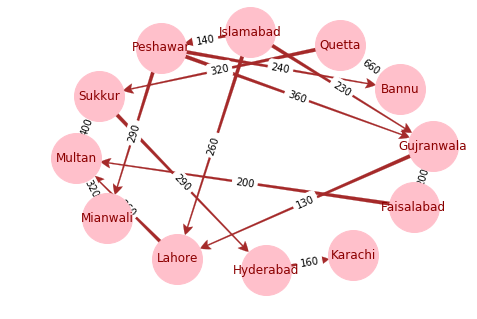

In [20]:
g.draw_graph()

In [21]:
path, time, dist = g.find_shortest_dijsktra('Islamabad', 'Karachi')
print("The shortest path is :", path)
print("The time taken would be :", time, "minutes")
print("The total distance would be :", dist, "km")

The shortest path is : ['Islamabad', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi']
The time taken would be : 1370 minutes
The total distance would be : 1652 km
